___
<h1 style="color:blue;">Self-Training</h1>

___


## Introduction to Self-Training

Self-training is a semi-supervised learning technique that leverages unlabeled data to improve the performance of a machine learning model. In self-training, the model is first trained on a small amount of labeled data and then used to predict labels for the unlabeled data. The predicted labels are added to the training set, and the model is retrained on the expanded dataset. This process is repeated iteratively, with the model gradually improving its performance by incorporating the predicted labels from the unlabeled data.

## Key Concepts

1. **Semi-Supervised Learning**: Self-training is a type of semi-supervised learning, where the model learns from both labeled and unlabeled data. By leveraging the unlabeled data, the model can generalize better and achieve higher performance than using labeled data alone.
2. **Pseudo-Labeling**: In self-training, the predicted labels for the unlabeled data are known as pseudo-labels. These labels are generated by the model itself and are used to expand the training set. The model is trained on the combined set of labeled and pseudo-labeled data.
3. **Confidence Thresholding**: To ensure the quality of the pseudo-labels, a confidence threshold can be applied to filter out uncertain predictions. Only predictions with high confidence are added to the training set, while uncertain predictions are discarded.
4. **Iterative Training**: Self-training is an iterative process where the model is trained on the expanded dataset multiple times. In each iteration, the model learns from the labeled and pseudo-labeled data, gradually improving its performance.
5. **Label Propagation**: Self-training can be viewed as a form of label propagation, where the model propagates the labels from the labeled data to the unlabeled data. By iteratively refining the pseudo-labels, the model effectively learns from the unlabeled data.

## Algorithm

The self-training algorithm can be summarized as follows:

1. **Initialize**: Train a model on a small amount of labeled data.
2. **Predict**: Use the trained model to predict labels for the unlabeled data.
3. **Filter**: Apply a confidence threshold to filter out uncertain predictions.
4. **Expand**: Add the high-confidence predictions to the training set as pseudo-labels.
5. **Retrain**: Retrain the model on the expanded dataset.
6. **Iterate**: Repeat steps 2-5 for a fixed number of iterations or until convergence.

## Applications

Self-training has been successfully applied to various machine learning tasks, including:

1. **Image Classification**: Self-training can improve the performance of image classification models by leveraging unlabeled images.
2. **Text Classification**: Self-training can be used to enhance text classification models by incorporating unlabeled text data.
3. **Speech Recognition**: Self-training has been applied to speech recognition tasks to improve the accuracy of speech recognition models.
4. **Anomaly Detection**: Self-training can help detect anomalies in data by learning from both labeled and unlabeled examples.
5. **Semi-Supervised Learning**: Self-training is a popular technique in semi-supervised learning, where labeled data is scarce but unlabeled data is abundant.

## MNIST Dataset Details

### Overview
The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. It consists of 60,000 training images and 10,000 test images, each of size 28x28 pixels.

### Content
- **Training Set**: 60,000 images
- **Test Set**: 10,000 images

### Features
Each image in the dataset is grayscale and has the following characteristics:
- Image Size: 28 x 28 pixels
- Pixel Value Range: 0 to 255 (0 for white, 255 for black)

### Labels
Each image is associated with a label from 0 to 9, representing the digit drawn in the image.

### Usage
The MNIST dataset is widely used for:
- Training and testing machine learning models, particularly in the field of image classification and pattern recognition.
- Benchmarking new algorithms in the field of machine learning and computer vision.

### Source
The dataset is publicly available and can be accessed from various repositories and libraries, including TensorFlow and PyTorch.

___
## <span style="color:blue;">Data Preprocessing</span>

___


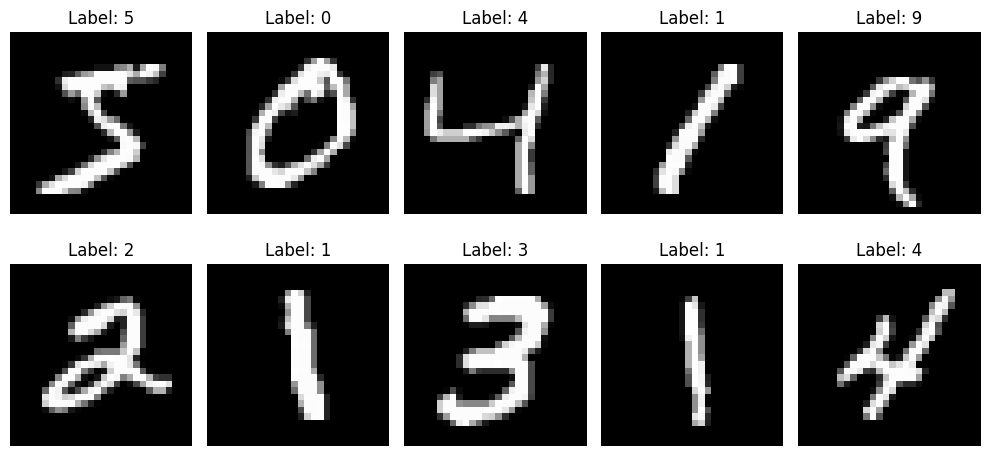

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the first 10 images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Self Training Model:



Epoch 1/10


169/169 [==============================] - 2s 6ms/step - loss: 0.5730 - accuracy: 0.8300 - val_loss: 0.3300 - val_accuracy: 0.8900
Epoch 2/10
169/169 [==============================] - 1s 6ms/step - loss: 0.2386 - accuracy: 0.9309 - val_loss: 0.2592 - val_accuracy: 0.9233
Epoch 3/10
169/169 [==============================] - 1s 5ms/step - loss: 0.1504 - accuracy: 0.9526 - val_loss: 0.2820 - val_accuracy: 0.9183
Epoch 4/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0937 - accuracy: 0.9735 - val_loss: 0.2158 - val_accuracy: 0.9417
Epoch 5/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0523 - accuracy: 0.9856 - val_loss: 0.2238 - val_accuracy: 0.9283
Epoch 6/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0395 - accuracy: 0.9885 - val_loss: 0.2265 - val_accuracy: 0.9483
Epoch 7/10
169/169 [==============================] - 1s 5ms/step - loss: 0.0318 - accuracy: 0.9904 - val_loss: 0.2594 - val_accuracy: 0.9383
Ep

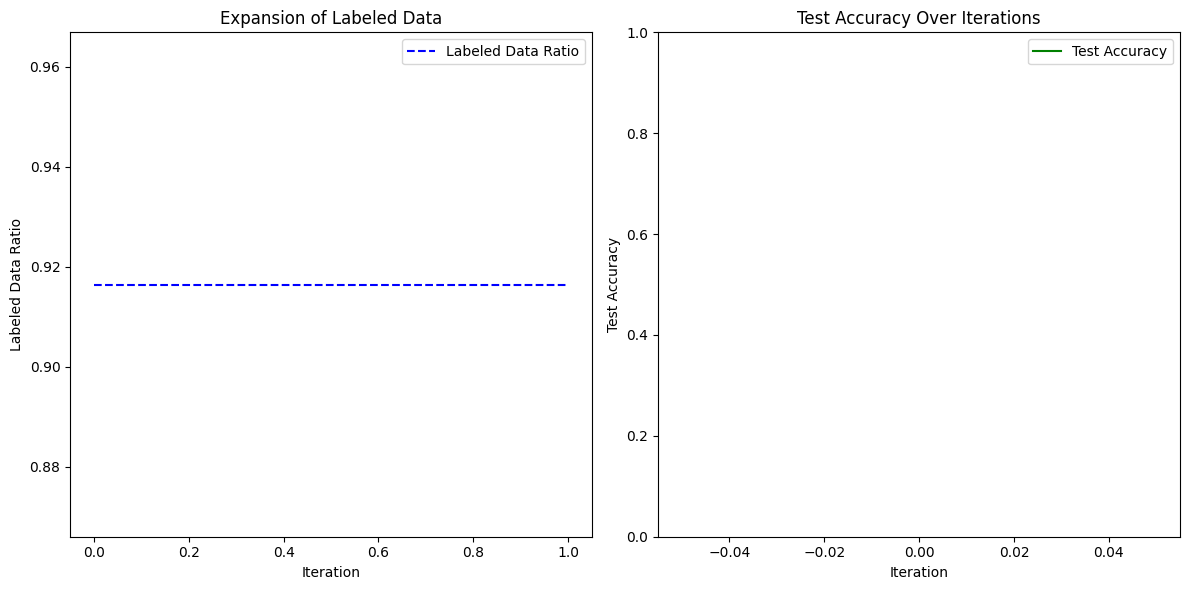

Self-training iteration 2/5
157/157 [==============================] - 0s 2ms/step


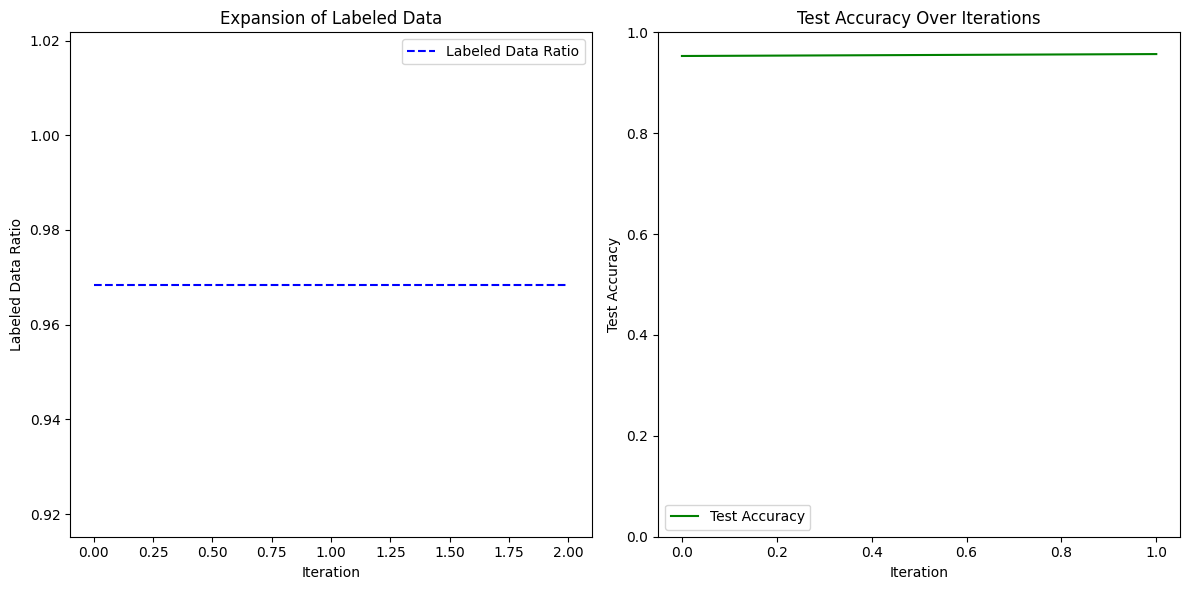

Self-training iteration 3/5
60/60 [==============================] - 0s 3ms/step


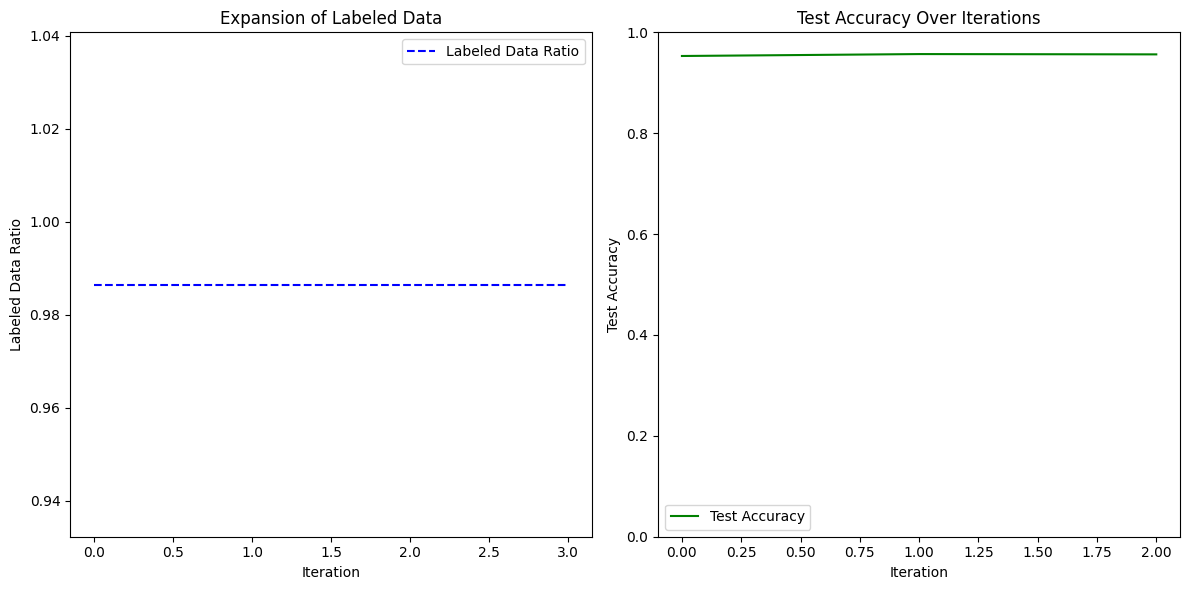

Self-training iteration 4/5
26/26 [==============================] - 0s 3ms/step


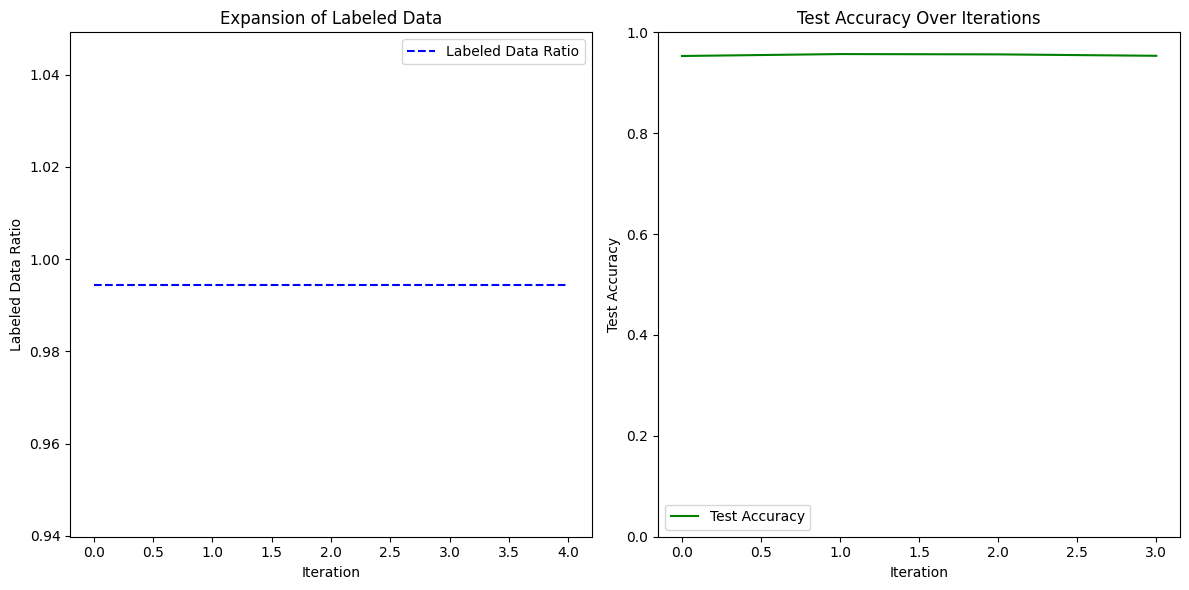

Self-training iteration 5/5
11/11 [==============================] - 0s 4ms/step


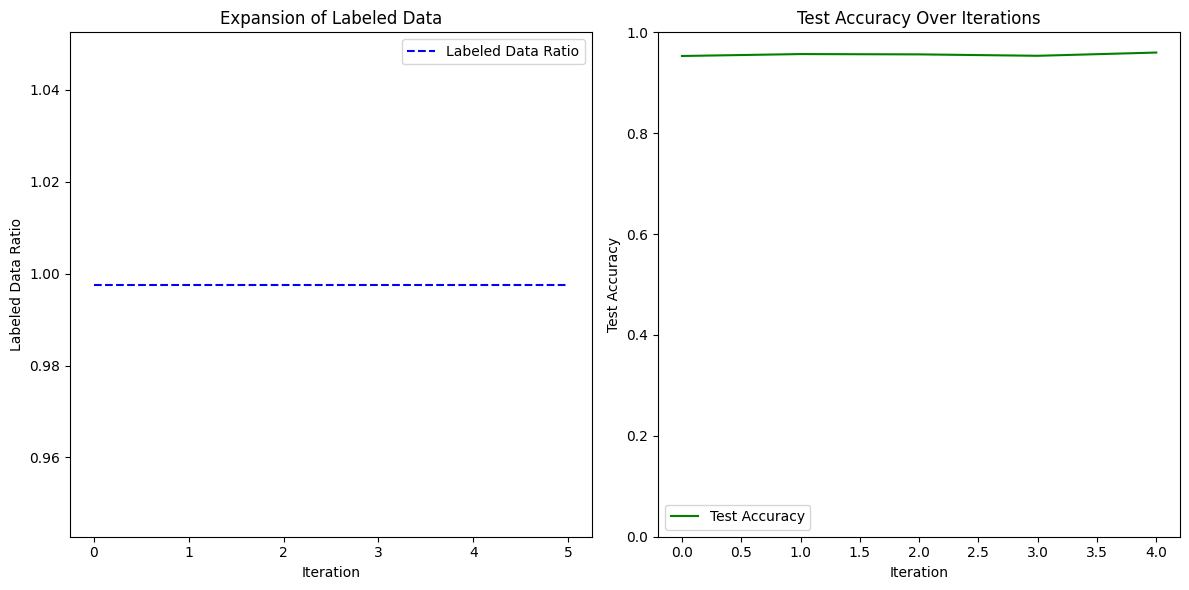

In [2]:
    # Normalize the dataset
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Split the labeled data (10% labeled, 90% unlabeled)
    x_train_labeled, x_train_unlabeled, y_train_labeled, y_train_unlabeled = train_test_split(
        x_train, y_train, test_size=0.9, stratify=y_train, random_state=42)

    # One-hot encode the labels
    y_train_labeled = to_categorical(y_train_labeled, 10)
    y_test = to_categorical(y_test, 10)

    # Build a simple neural network model
    def create_model():
        model = Sequential([
            Flatten(input_shape=(28, 28)),
            Dense(256, activation='relu'),
            Dense(256, activation='relu'),
            Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    # Initial training on labeled data
    model = create_model()
    history = model.fit(x_train_labeled, y_train_labeled, epochs=10, batch_size=32, validation_split=0.1)

    # Self-training loop
    num_iterations = 5
    confidence_threshold = 0.95
    accuracy_history = []

    for iteration in range(num_iterations):
        print(f"Self-training iteration {iteration + 1}/{num_iterations}")
        
        # Predict labels for unlabeled data
        predictions = model.predict(x_train_unlabeled)
        
        # Select samples with high confidence
        max_probs = np.max(predictions, axis=1)
        confident_indices = np.where(max_probs > confidence_threshold)[0]
        new_labeled_data = x_train_unlabeled[confident_indices]
        new_labels = np.argmax(predictions[confident_indices], axis=1)
        
        # Remove newly labeled data from the unlabeled set
        x_train_unlabeled = np.delete(x_train_unlabeled, confident_indices, axis=0)
        
        # Add new labeled data to the training set
        x_train_labeled = np.concatenate([x_train_labeled, new_labeled_data], axis=0)
        y_train_labeled = np.concatenate([y_train_labeled, to_categorical(new_labels, 10)], axis=0)
        
        # Retrain the model with the expanded labeled dataset
        history = model.fit(x_train_labeled, y_train_labeled, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
        
        # Evaluate model on test set
        _, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
        accuracy_history.append(test_accuracy)
        
        # Plot the labeled dataset size and test accuracy over iterations
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.plot(range(iteration + 2), [len(x_train_labeled) / len(x_train)] * (iteration + 2), 'b--', label='Labeled Data Ratio')
        plt.xlabel('Iteration')
        plt.ylabel('Labeled Data Ratio')
        plt.title('Expansion of Labeled Data')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(range(iteration + 1), accuracy_history, 'g-', label='Test Accuracy')
        plt.xlabel('Iteration')
        plt.ylabel('Test Accuracy')
        plt.title('Test Accuracy Over Iterations')
        plt.ylim([0, 1])
        plt.legend()
        
        plt.tight_layout()
        plt.show()


___
## <span style="color:blue;">Model Evaluation</span>

___

In [3]:
# Final evaluation on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.5374 - accuracy: 0.9599
Final Test Accuracy: 0.9599


___
## <span style="color:blue;">CONCLUSION</span>

___


### Summary of Self-Training Model Evaluation

The Self-Training model for classification was trained on the MNIST dataset, achieving the following performance metrics:

- **Accuracy**: 95.99%
- **Loss**: 0.5374

### Insights and Performance

- The model demonstrates high accuracy, indicating its effectiveness in correctly classifying digits from the MNIST dataset.
- The loss value of 0.5444 suggests that the model has learned to minimize errors effectively during training.
- Self-Training has proven to be a valuable approach for leveraging unlabeled data to enhance model performance, particularly in scenarios where labeled data is limited or expensive to obtain.
- Further optimization and fine-tuning of hyperparameters could potentially improve the model's accuracy and reduce loss even further.

### Recommendations

- Experiment with different self-training strategies, such as varying the threshold for pseudo-labeled data inclusion or exploring alternative semi-supervised learning techniques.
- Consider augmenting the dataset with additional labeled and unlabeled data to further boost model generalization and robustness.

### Acknowledgments

- **Dataset**: The MNIST dataset used in this analysis is a widely recognized benchmark in the machine learning community.
- **Tools**: Python, TensorFlow/Keras, and Matplotlib were instrumental in data preprocessing, model development, evaluation, and visualization.

Overall, the Self-Training approach has demonstrated promising results in enhancing classification performance on the MNIST dataset, highlighting its potential for practical applications in semi-supervised learning scenarios.
